In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt # plotting
from sklearn import metrics
import statsmodels.formula.api as smf # linear modeling
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler       # scaling data
from sklearn.model_selection import train_test_split # splitting data
from sklearn.neighbors import KNeighborsRegressor    # regressor
from sklearn.model_selection import GridSearchCV     # for grid search
from sklearn.pipeline import make_pipeline           # for making pipelines
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
stock_fundamentals = pd.read_csv("nyse/fundamentals.csv")
stock_prices = pd.read_csv("nyse/prices.csv")
stock_price_adj = pd.read_csv("nyse/prices-split-adjusted.csv")


In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [5]:
stock_price_adj.head()
stock_fundamentals.head()


Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   
1           1           AAL    2013-12-31      4.975000e+09   
2           2           AAL    2014-12-31      4.668000e+09   
3           3           AAL    2015-12-31      5.102000e+09   
4           4           AAP    2012-12-29      2.409453e+09   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -222000000.0               -1.961000e+09           23.0   
1          -93000000.0               -2.723000e+09           67.0   
2         -160000000.0               -1.500000e+08          143.0   
3          352000000.0               -7.080000e+08          135.0   
4          -89482000.0                6.000000e+05           32.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  \
0         -1.888000e+09     4.695000e+09        53.0   
1         -3.114000e+09     1.059200e+10        75.0   
2         -5.311000e+09     1.513500e+10        60.0   
3         -6.151000e+09     1.159100e+10        51.0   
4         -2.711820e+08     5.202150e+08        23.0   

   Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
0               1.330000e+09                     0.0    127000000.0   
1               2.175000e+09                     0.0      5000000.0   
2               1.768000e+09                     0.0      7000000.0   
3               1.085000e+09                     0.0      6000000.0   
4               5.981110e+08            -260298000.0         7000.0   

   Cost of Revenue  Current Ratio  Deferred Asset Charges  \
0     1.049900e+10           78.0            0.000000e+00   
1     1.101900e+10          104.0            0.000000e+00   
2     1.562000e+10           88.0            0.000000e+00   
3     1.109600e+10           73.0            2.477000e+09   
4     3.106967e+09          124.0            0.000000e+00   

   Deferred Liability Charges  Depreciation  Earnings Before Interest and Tax  \
0                 223000000.0  1.001000e+09                     -1.813000e+09   
1                 935000000.0  1.020000e+09                     -1.324000e+09   
2                 829000000.0  1.342000e+09                      4.099000e+09   
3                 667000000.0  1.487000e+09                      5.496000e+09   
4                         0.0  1.895440e+08                      6.579150e+08   

   Earnings Before Tax  Effect of Exchange Rate  \
0        -2.445000e+09                      0.0   
1        -2.180000e+09                      0.0   
2         3.212000e+09                      0.0   
3         4.616000e+09                      0.0   
4         6.240740e+08                      0.0   

   Equity Earnings/Loss Unconsolidated Subsidiary  Fixed Assets      Goodwill  \
0                                             0.0  1.340200e+10  0.000000e+00   
1                                             0.0  1.925900e+10  4.086000e+09   
2                                             0.0  2.308400e+10  4.091000e+09   
3                                             0.0  2.751000e+10  4.091000e+09   
4                                             0.0  1.292547e+09  7.638900e+07   

   Gross Margin  Gross Profit    Income Tax  Intangible Assets  \
0          58.0  1.435600e+10 -5.690000e+08       8.690000e+08   
1          59.0  1.572400e+10 -3.460000e+08       2.311000e+09   
2          63.0  2.703000e+10  3.300000e+08       2.240000e+09   
3          73.0  2.989400e+10 -2.994000e+09       2.249000e+09   
4          50.0  3.098036e+09  2.364040e+08       2.884500e+07   

   Interest Expense     Inventory   Investments   Liabilities  Long-Term Debt  \
0       632000000.0  5.800000e+08  3.060000e+08  4.730000e+08    7.116000e+09   
1       856000000.0  1.012000e+09 -1.181000e+09 -2.350000e+08    1.535300e+10   
2       887000000.0  1.004000e+09  1.799000e+09 -1.026000e+09    1.604300e+10   
3       880000000.0  8.630000e+08  4.430000e+08 -6.330000e+08    1.833000e+1

In [6]:
stock_fundamentals["id"] = stock_fundamentals["Ticker Symbol"] + " " + stock_fundamentals["Period Ending"]
stock_price_adj["id"] = stock_price_adj["symbol"] + " " + stock_price_adj["date"]
len(stock_price_adj)

851264

In [7]:
stock_price_adj.head()

date symbol        open       close         low        high  \
0  2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume               id  
0  2163600.0  WLTW 2016-01-05  
1  2386400.0  WLTW 2016-01-06  
2  2489500.0  WLTW 2016-01-07  
3  2006300.0  WLTW 2016-01-08  
4  1408600.0  WLTW 2016-01-11

In [8]:
combined = pd.merge(stock_fundamentals, stock_price_adj)
combined.head()

Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   
1           1           AAL    2013-12-31      4.975000e+09   
2           2           AAL    2014-12-31      4.668000e+09   
3           3           AAL    2015-12-31      5.102000e+09   
4          13          ABBV    2013-12-31      6.448000e+09   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -222000000.0               -1.961000e+09           23.0   
1          -93000000.0               -2.723000e+09           67.0   
2         -160000000.0               -1.500000e+08          143.0   
3          352000000.0               -7.080000e+08          135.0   
4          681000000.0               -5.400000e+07           92.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  \
0         -1.888000e+09     4.695000e+09        53.0   
1         -3.114000e+09     1.059200e+10        75.0   
2         -5.311000e+09     1.513500e+10        60.0   
3         -6.151000e+09     1.159100e+10        51.0   
4         -4.910000e+08     3.671000e+09       144.0   

   Cash and Cash Equivalents  Changes in Inventories  Common Stocks  \
0               1.330000e+09                     0.0    127000000.0   
1               2.175000e+09                     0.0      5000000.0   
2               1.768000e+09                     0.0      7000000.0   
3               1.085000e+09                     0.0      6000000.0   
4               9.595000e+09             -56000000.0     16000000.0   

   Cost of Revenue  Current Ratio  Deferred Asset Charges  \
0     1.049900e+10           78.0            0.000000e+00   
1     1.101900e+10          104.0            0.000000e+00   
2     1.562000e+10           88.0            0.000000e+00   
3     1.109600e+10           73.0            2.477000e+09   
4     4.581000e+09          259.0            0.000000e+00   

   Deferred Liability Charges  Depreciation  Earnings Before Interest and Tax  \
0                 223000000.0  1.001000e+09                     -1.813000e+09   
1                 935000000.0  1.020000e+09                     -1.324000e+09   
2                 829000000.0  1.342000e+09                      4.099000e+09   
3                 667000000.0  1.487000e+09                      5.496000e+09   
4                         0.0  8.970000e+08                      5.610000e+09   

   Earnings Before Tax  Effect of Exchange Rate  \
0        -2.445000e+09                      0.0   
1        -2.180000e+09                      0.0   
2         3.212000e+09                      0.0   
3         4.616000e+09                      0.0   
4         5.332000e+09              -10000000.0   

   Equity Earnings/Loss Unconsolidated Subsidiary  Fixed Assets      Goodwill  \
0                                             0.0  1.340200e+10  0.000000e+00   
1                                             0.0  1.925900e+10  4.086000e+09   
2                                             0.0  2.308400e+10  4.091000e+09   
3                                             0.0  2.751000e+10  4.091000e+09   
4                                             0.0  2.298000e+09  6.277000e+09   

   Gross Margin  Gross Profit    Income Tax  Intangible Assets  \
0          58.0  1.435600e+10 -5.690000e+08       8.690000e+08   
1          59.0  1.572400e+10 -3.460000e+08       2.311000e+09   
2          63.0  2.703000e+10  3.300000e+08       2.240000e+09   
3          73.0  2.989400e+10 -2.994000e+09       2.249000e+09   
4          76.0  1.420900e+10  1.204000e+09       1.890000e+09   

   Interest Expense     Inventory   Investments   Liabilities  Long-Term Debt  \
0       632000000.0  5.800000e+08  3.060000e+08  4.730000e+08    7.116000e+09   
1       856000000.0  1.012000e+09 -1.181000e+09 -2.350000e+08    1.535300e+10   
2       887000000.0  1.004000e+09  1.799000e+09 -1.026000e+09    1.604300e+10   
3       880000000.0  8.630000e+08  4.430000e+08 -6.330000e+08    1.833000e+1

In [9]:
combined_group = combined.groupby("Ticker Symbol").count()
combined_group.head()

Unnamed: 0  Period Ending  Accounts Payable  \
Ticker Symbol                                                
AAL                     4              4                 4   
ABBV                    3              3                 3   
ABC                     4              4                 4   
ABT                     4              4                 4   
ADBE                    4              4                 4   

               Accounts Receivable  Add'l income/expense items  After Tax ROE  \
Ticker Symbol                                                                   
AAL                              4                           4              4   
ABBV                             3                           3              3   
ABC                              4                           4              4   
ABT                              4                           4              4   
ADBE                             4                           4              4   

               Capital Expenditures  Capital Surplus  Cash Ratio  \
Ticker Symbol                                                      
AAL                               4                4           4   
ABBV                              3                3           3   
ABC                               4                4           4   
ABT                               4                4           4   
ADBE                              4                4           4   

               Cash and Cash Equivalents  Changes in Inventories  \
Ticker Symbol                                                      
AAL                                    4                       4   
ABBV                                   3                       3   
ABC                                    4                       4   
ABT                                    4                       4   
ADBE                                   4                       4   

               Common Stocks  Cost of Revenue  Current Ratio  \
Ticker Symbol                                                  
AAL                        4                4              4   
ABBV                       3                3              3   
ABC                        4                4              4   
ABT                        4                4              4   
ADBE                       4                4              4   

               Deferred Asset Charges  Deferred Liability Charges  \
Ticker Symbol                                                       
AAL                                 4                           4   
ABBV                                3                           3   
ABC                                 4                           4   
ABT                                 4                           4   
ADBE                                4                           4   

               Depreciation  Earnings Before Interest and Tax  \
Ticker Symbol                                                   
AAL                       4                                 4   
ABBV                      3                                 3   
ABC                       4                                 4   
ABT                       4                                 4   
ADBE                      4                                 4   

               Earnings Before Tax  Effect of Exchange Rate  \
Ticker Symbol                                                 
AAL                              4                        4   
ABBV                             3                        3   
ABC                              4                        4   
ABT                              4                        4   
ADBE                             4                        4   

               Equity Earnings/Loss Unconsolidated Subsidiary  Fixed Assets  \
Ticker Symbol                                                                 
AAL                                                         4        

In [10]:
condensed = combined[['id', 'Ticker Symbol', 'Period Ending','Accounts Payable', 'Accounts Receivable','After Tax ROE', 
          'Cash Ratio', 'Current Ratio', 'Earnings Before Interest and Tax','Fixed Assets', 
          'Gross Margin' ,'Gross Profit', 'Interest Expense', 'Investments', 'Liabilities','Long-Term Investments', 
          'Net Cash Flow' , 'Net Income', 'Net Receivables', 'Operating Income', 
          'Operating Margin', 'Pre-Tax Margin', 'Pre-Tax ROE','Quick Ratio', 'Total Assets', 
          'Total Current Liabilities', 'Total Revenue', 'Total Liabilities', 'Earnings Per Share', 'open']]


In [11]:
condensed

id Ticker Symbol Period Ending  Accounts Payable  \
0      AAL 2012-12-31           AAL    2012-12-31      3.068000e+09   
1      AAL 2013-12-31           AAL    2013-12-31      4.975000e+09   
2      AAL 2014-12-31           AAL    2014-12-31      4.668000e+09   
3      AAL 2015-12-31           AAL    2015-12-31      5.102000e+09   
4     ABBV 2013-12-31          ABBV    2013-12-31      6.448000e+09   
5     ABBV 2014-12-31          ABBV    2014-12-31      6.954000e+09   
6     ABBV 2015-12-31          ABBV    2015-12-31      8.463000e+09   
7      ABC 2013-09-30           ABC    2013-09-30      1.487064e+10   
8      ABC 2014-09-30           ABC    2014-09-30      1.725016e+10   
9      ABC 2015-09-30           ABC    2015-09-30      2.157823e+10   
10     ABC 2016-09-30           ABC    2016-09-30      2.467016e+10   
11     ABT 2012-12-31           ABT    2012-12-31      1.088900e+10   
12     ABT 2013-12-31           ABT    2013-12-31      5.948000e+09   
13     ABT 2014-12-31           ABT    2014-12-31      5.350000e+09   
14     ABT 2015-12-31           ABT    2015-12-31      5.683000e+09   
15    ADBE 2013-11-29          ADBE    2013-11-29      7.292570e+08   
16    ADBE 2014-11-28          ADBE    2014-11-28      7.761630e+08   
17    ADBE 2015-11-27          ADBE    2015-11-27      7.793560e+08   
18    ADBE 2016-12-02          ADBE    2016-12-02      8.660160e+08   
19     ADM 2012-12-31           ADM    2012-12-31      9.308000e+09   
20     ADM 2013-12-31           ADM    2013-12-31      1.413500e+10   
21     ADM 2014-12-31           ADM    2014-12-31      1.524000e+10   
22     ADM 2015-12-31           ADM    2015-12-31      1.340700e+10   
23     ADS 2012-12-31           ADS    2012-12-31      4.900950e+08   
24     ADS 2013-12-31           ADS    2013-12-31      4.723260e+08   
25     ADS 2014-12-31           ADS    2014-12-31      9.140580e+08   
26     ADS 2015-12-31           ADS    2015-12-31      1.010619e+09   
27    ADSK 2013-01-31          ADSK    2013-01-31      3.967000e+08   
28    ADSK 2014-01-31          ADSK    2014-01-31      3.753000e+08   
29     AEE 2012-12-31           AEE    2012-12-31      6.710000e+08   
30     AEE 2013-12-31           AEE    2013-12-31      9.470000e+08   
31     AEE 2014-12-31           AEE    2014-12-31      8.420000e+08   
32     AEE 2015-12-31           AEE    2015-12-31      9.090000e+08   
33     AEP 2012-12-31           AEP    2012-12-31      2.185000e+09   
34     AEP 2013-12-31           AEP    2013-12-31      2.333000e+09   
35     AEP 2014-12-31           AEP    2014-12-31      2.360000e+09   
36     AEP 2015-12-31           AEP    2015-12-31      2.624000e+09   
37     AFL 2012-12-31           AFL    2012-12-31      3.858000e+09   
38     AFL 2013-12-31           AFL    2013-12-31      3.718000e+09   
39     AFL 2014-12-31           AFL    2014-12-31      5.293000e+09   
40     AFL 2015-12-31           AFL    2015-12-31      4.340000e+09   
41     AIG 2012-12-31           AIG    2012-12-31      0.000000e+00   
42     AIG 2013-12-31           AIG    2013-12-31      0.000000e+00   
43     AIG 2014-12-31           AIG    2014-12-31      0.000000e+00   
44     AIG 2015-12-31           AIG    2015-12-31      0.000000e+00   
45     AIV 2012-12-31           AIV    2012-12-31      3.443580e+08   
46     AIV 2013-12-31           AIV    2013-12-31      3.307560e+08   
47     AIV 2014-12-31           AIV    2014-12-31      3.209960e+08   
48     AIV 2015-12-31           AIV    2015-12-31      3.550980e+08   
49     AIZ 2013-12-31           AIZ    2013-12-31      1.901799e+09   
50     AIZ 2014-12-31           AIZ    2014-12-31      2.832604e+09   
51     AIZ 2015-12-31           AIZ    2015-12-31      2.182538e+09   
52     AJG 2013-12-31           AJG    2013-12-31      2.525300e+09   
53     AJG 2014-12-31           AJG    2014-12-31      3.247000e+09   
54     AJG 2015-12-31           AJG    2015-12-31      3.689800e+09   
55    AKAM 2012-12-31          AKAM    2012

In [12]:
condensed['Total Revenue'].quantile([0.25,0.5,0.75])

0.25    3.484500e+09
0.50    7.637000e+09
0.75    1.688960e+10
Name: Total Revenue, dtype: float64

In [13]:
condensed['Company Size'] = ''

In [14]:
for i in range(0, len(condensed)):
    print(condensed["Total Revenue"][i])
    print(i)
    if(condensed['Total Revenue'][i] < 3.484500e+09):
         condensed['Company Size'][i] = 'small'
    elif(condensed['Total Revenue'][i] < 7.637000e+09 and condensed['Total Revenue'][i] > 3.484500e+09):
        condensed['Company Size'][i] = 'medium'
    else:
        condensed['Company Size'][i] = 'large'
    

24855000000.0
0
26743000000.0
1
42650000000.0
2
40990000000.0
3
18790000000.0
4
19960000000.0
5
22859000000.0
6
87959167000.0
7
119569127000.0
8
135961803000.0
9
146849686000.0
10
19050000000.0
11
19657000000.0
12
20247000000.0
13
20405000000.0
14
4055240000.0
15
4147065000.0
16
4795511000.0
17
5854430000.0
18
90559000000.0
19
89804000000.0
20
81201000000.0
21
67702000000.0
22
3641390000.0
23
4319063000.0
24
5302940000.0
25
6439746000.0
26
2312200000.0
27
2273900000.0
28
5781000000.0
29
5838000000.0
30
6053000000.0
31
6098000000.0
32
14945000000.0
33
14813500000.0
34
16378600000.0
35
16453200000.0
36
25364000000.0
37
23939000000.0
38
22728000000.0
39
20872000000.0
40
71214000000.0
41
68874000000.0
42
64406000000.0
43
58327000000.0
44
958511000.0
45
974053000.0
46
984363000.0
47
981310000.0
48
9047657000.0
49
10381653000.0
50
10325494000.0
51
3179600000.0
52
4626500000.0
53
5392400000.0
54
1373947000.0
55
1577922000.0
56
1963874000.0
57
2197448000.0
58
2519154000.0
59
2394270000.0
60
24

3326106000.0
485
3733507000.0
486
3869187000.0
487
7872000000.0
488
12466000000.0
489
17928000000.0
490
3703600000.0
491
4013600000.0
492
4579400000.0
493
18010000000.0
494
20921000000.0
495
21438000000.0
496
15877000000.0
497
44287000000.0
498
50365000000.0
499
15255000000.0
500
14892000000.0
501
15049000000.0
502
15026000000.0
503
1481314000.0
504
1732046000.0
505
1919823000.0
506
1995034000.0
507
5795800000.0
508
6063400000.0
509
6413800000.0
510
6595200000.0
511
4436000000.0
512
4814000000.0
513
5066000000.0
514
5254000000.0
515
1405358000.0
516
1496372000.0
517
1530654000.0
518
1557067000.0
519
27351573000.0
520
21531577000.0
521
18114048000.0
522
4954619000.0
523
4877885000.0
524
4561030000.0
525
3409900000.0
526
3130700000.0
527
3258700000.0
528
3276500000.0
529
637413000.0
530
686090000.0
531
744012000.0
532
3368545000.0
533
3309616000.0
534
3391187000.0
535
3578995000.0
536
5011853000.0
537
4762000000.0
538
4772000000.0
539
5576000000.0
540
30930000000.0
541
30852000000.0
542


18534400000.0
957
18671300000.0
958
15598000000.0
959
17090000000.0
960
16833000000.0
961
5260956000.0
962
6793306000.0
963
8441971000.0
964
9223987000.0
965
9781000000.0
966
9968000000.0
967
10886000000.0
968
10415000000.0
969
54657000000.0
970
51584000000.0
971
49605000000.0
972
48851000000.0
973
9289500000.0
974
10477600000.0
975
11964400000.0
976
2104745000.0
977
2819557000.0
978
4103728000.0
979
17083900000.0
980
18170900000.0
981
19391400000.0
982
20853800000.0
983
13215971000.0
984
12711744000.0
985
11360753000.0
986
5679595000.0
987
5822363000.0
988
5981964000.0
989
80029000000.0
990
80106000000.0
991
73908000000.0
992
16606000000.0
993
16872000000.0
994
16281000000.0
995
16270000000.0
996
4306800000.0
997
6999700000.0
998
7039000000.0
999
6449000000.0
1000
3301804000.0
1001
3454628000.0
1002
3491632000.0
1003
3495443000.0
1004
14265000000.0
1005
14791000000.0
1006
14766000000.0
1007
12132000000.0
1008
7263000000.0
1009
7852000000.0
1010
7669000000.0
1011
84847000000.0
1012
414

In [15]:
a = pd.get_dummies(condensed[['Company Size']])
condensed['Company Size_Small'] = a['Company Size_small']
condensed['Company Size_Medium'] = a['Company Size_medium']
condensed['Company Size_Large'] = a['Company Size_large']
condensed = condensed.drop(columns=['Company Size'], axis = 1)
condensed

id Ticker Symbol Period Ending  Accounts Payable  \
0      AAL 2012-12-31           AAL    2012-12-31      3.068000e+09   
1      AAL 2013-12-31           AAL    2013-12-31      4.975000e+09   
2      AAL 2014-12-31           AAL    2014-12-31      4.668000e+09   
3      AAL 2015-12-31           AAL    2015-12-31      5.102000e+09   
4     ABBV 2013-12-31          ABBV    2013-12-31      6.448000e+09   
5     ABBV 2014-12-31          ABBV    2014-12-31      6.954000e+09   
6     ABBV 2015-12-31          ABBV    2015-12-31      8.463000e+09   
7      ABC 2013-09-30           ABC    2013-09-30      1.487064e+10   
8      ABC 2014-09-30           ABC    2014-09-30      1.725016e+10   
9      ABC 2015-09-30           ABC    2015-09-30      2.157823e+10   
10     ABC 2016-09-30           ABC    2016-09-30      2.467016e+10   
11     ABT 2012-12-31           ABT    2012-12-31      1.088900e+10   
12     ABT 2013-12-31           ABT    2013-12-31      5.948000e+09   
13     ABT 2014-12-31           ABT    2014-12-31      5.350000e+09   
14     ABT 2015-12-31           ABT    2015-12-31      5.683000e+09   
15    ADBE 2013-11-29          ADBE    2013-11-29      7.292570e+08   
16    ADBE 2014-11-28          ADBE    2014-11-28      7.761630e+08   
17    ADBE 2015-11-27          ADBE    2015-11-27      7.793560e+08   
18    ADBE 2016-12-02          ADBE    2016-12-02      8.660160e+08   
19     ADM 2012-12-31           ADM    2012-12-31      9.308000e+09   
20     ADM 2013-12-31           ADM    2013-12-31      1.413500e+10   
21     ADM 2014-12-31           ADM    2014-12-31      1.524000e+10   
22     ADM 2015-12-31           ADM    2015-12-31      1.340700e+10   
23     ADS 2012-12-31           ADS    2012-12-31      4.900950e+08   
24     ADS 2013-12-31           ADS    2013-12-31      4.723260e+08   
25     ADS 2014-12-31           ADS    2014-12-31      9.140580e+08   
26     ADS 2015-12-31           ADS    2015-12-31      1.010619e+09   
27    ADSK 2013-01-31          ADSK    2013-01-31      3.967000e+08   
28    ADSK 2014-01-31          ADSK    2014-01-31      3.753000e+08   
29     AEE 2012-12-31           AEE    2012-12-31      6.710000e+08   
30     AEE 2013-12-31           AEE    2013-12-31      9.470000e+08   
31     AEE 2014-12-31           AEE    2014-12-31      8.420000e+08   
32     AEE 2015-12-31           AEE    2015-12-31      9.090000e+08   
33     AEP 2012-12-31           AEP    2012-12-31      2.185000e+09   
34     AEP 2013-12-31           AEP    2013-12-31      2.333000e+09   
35     AEP 2014-12-31           AEP    2014-12-31      2.360000e+09   
36     AEP 2015-12-31           AEP    2015-12-31      2.624000e+09   
37     AFL 2012-12-31           AFL    2012-12-31      3.858000e+09   
38     AFL 2013-12-31           AFL    2013-12-31      3.718000e+09   
39     AFL 2014-12-31           AFL    2014-12-31      5.293000e+09   
40     AFL 2015-12-31           AFL    2015-12-31      4.340000e+09   
41     AIG 2012-12-31           AIG    2012-12-31      0.000000e+00   
42     AIG 2013-12-31           AIG    2013-12-31      0.000000e+00   
43     AIG 2014-12-31           AIG    2014-12-31      0.000000e+00   
44     AIG 2015-12-31           AIG    2015-12-31      0.000000e+00   
45     AIV 2012-12-31           AIV    2012-12-31      3.443580e+08   
46     AIV 2013-12-31           AIV    2013-12-31      3.307560e+08   
47     AIV 2014-12-31           AIV    2014-12-31      3.209960e+08   
48     AIV 2015-12-31           AIV    2015-12-31      3.550980e+08   
49     AIZ 2013-12-31           AIZ    2013-12-31      1.901799e+09   
50     AIZ 2014-12-31           AIZ    2014-12-31      2.832604e+09   
51     AIZ 2015-12-31           AIZ    2015-12-31      2.182538e+09   
52     AJG 2013-12-31           AJG    2013-12-31      2.525300e+09   
53     AJG 2014-12-31           AJG    2014-12-31      3.247000e+09   
54     AJG 2015-12-31           AJG    2015-12-31      3.689800e+09   
55    AKAM 2012-12-31          AKAM    2012

In [16]:
averages = condensed[['id', 'Ticker Symbol','Accounts Payable', 'Accounts Receivable',
                      'Earnings Before Interest and Tax','Fixed Assets','Gross Profit', 
                      'Interest Expense', 'Investments', 'Liabilities','Long-Term Investments', 'Net Cash Flow' , 
                      'Net Income', 'Net Receivables', 'Operating Income','Total Assets', 'Total Current Liabilities',
                      'Total Revenue', 'Total Liabilities', 'open']]

In [17]:
per = condensed[['id', 'Ticker Symbol','After Tax ROE', 'Cash Ratio', 'Current Ratio','Gross Margin',
                 'Operating Margin', 'Pre-Tax Margin', 'Pre-Tax ROE','Quick Ratio', 'Earnings Per Share', 
                'Company Size_Small', 'Company Size_Medium', 'Company Size_Large']];

In [18]:
per_avg = per.groupby('Ticker Symbol').sum() / per.groupby('Ticker Symbol').count()
per_avg

After Tax ROE  Cash Ratio  Company Size_Large  \
Ticker Symbol                                                  
AAL                92.000000   59.750000            1.000000   
ABBV              108.000000   98.333333            1.000000   
ABC                30.500000    9.750000            1.000000   
ABT                16.000000   77.250000            1.000000   
ADBE                8.250000  176.750000            0.000000   
ADM                 8.750000   43.500000            1.000000   
ADS                47.250000   27.750000            0.000000   
ADSK               11.000000  199.500000            0.000000   
AEE                 9.500000    5.500000            0.000000   
AEP                 9.500000    9.000000            1.000000   
AFL                17.500000         NaN            1.000000   
AIG                 5.500000         NaN            1.000000   
AIV                18.750000         NaN            0.000000   
AIZ                 7.333333         NaN            1.000000   
AJG                10.666667         NaN            0.000000   
AKAM               10.250000  231.000000            0.000000   
ALB                15.500000  116.000000            0.000000   
ALK                27.500000   79.500000            0.000000   
ALL                11.500000         NaN            1.000000   
ALLE             1433.333333   51.666667            0.000000   
ALXN               11.000000  259.333333            0.000000   
AME                17.500000   32.250000            0.000000   
AMG                15.000000         NaN            0.000000   
AMGN               22.666667  330.666667            1.000000   
AMP                17.250000         NaN            1.000000   
AMT                16.250000   46.000000            0.000000   
AMZN                3.000000   58.000000            1.000000   
AN                 19.000000    1.666667            1.000000   
ANTM               10.750000         NaN            1.000000   
AON                17.750000         NaN            1.000000   
APA               237.500000   36.250000            0.750000   
APC                21.666667   53.000000            1.000000   
APD                13.500000   19.250000            1.000000   
APH                23.250000  120.500000            0.000000   
ARNC                7.000000   31.500000            1.000000   
ATVI               12.000000  149.750000            0.000000   
AVB                 6.500000         NaN            0.000000   
AVY                14.000000   11.000000            0.000000   
AWK                 8.500000    4.000000            0.000000   
AXP                26.000000         NaN            1.000000   
AYI                17.000000  103.000000            0.000000   
BA                 58.666667   27.000000            1.000000   
BAC                 3.750000         NaN            1.000000   
BAX                25.000000   74.250000            1.000000   
BBT                 8.250000         NaN            1.000000   
BCR                19.333333  143.666667            0.000000   
BDX                18.000000   80.750000            1.000000   
BHI                 9.000000   51.000000            1.000000   
BIIB               29.000000   95.333333            0.666667   
BK                  7.000000         NaN            1.000000   
BLL                34.000000   13.000000            1.000000   
BMY                13.750000   52.750000            1.000000   
BSX                16.750000   14.500000            0.000000   
BWA                17.666667   40.000000            0.666667   
BXP                 9.250000         NaN            0.000000   
C                   5.500000         NaN            1.000000   
CAH                19.666667   19.333333            1.000000   
CAT                16.666667   24.333333            1.000000   
CB                 10.750000         NaN            1.000000   
CBG                19.750000   26.000000            0.500000   
CCI                 8.500000   51.000000       

In [19]:
counts = averages.groupby('Ticker Symbol').count()
counts['id'].head()

Ticker Symbol
AAL     4
ABBV    3
ABC     4
ABT     4
ADBE    4
Name: id, dtype: int64

In [20]:
averages 

id Ticker Symbol  Accounts Payable  Accounts Receivable  \
0      AAL 2012-12-31           AAL      3.068000e+09        -2.220000e+08   
1      AAL 2013-12-31           AAL      4.975000e+09        -9.300000e+07   
2      AAL 2014-12-31           AAL      4.668000e+09        -1.600000e+08   
3      AAL 2015-12-31           AAL      5.102000e+09         3.520000e+08   
4     ABBV 2013-12-31          ABBV      6.448000e+09         6.810000e+08   
5     ABBV 2014-12-31          ABBV      6.954000e+09        -1.720000e+08   
6     ABBV 2015-12-31          ABBV      8.463000e+09        -1.076000e+09   
7      ABC 2013-09-30           ABC      1.487064e+10        -2.312518e+09   
8      ABC 2014-09-30           ABC      1.725016e+10        -9.382860e+08   
9      ABC 2015-09-30           ABC      2.157823e+10        -1.478793e+09   
10     ABC 2016-09-30           ABC      2.467016e+10        -9.127240e+08   
11     ABT 2012-12-31           ABT      1.088900e+10         3.600000e+07   
12     ABT 2013-12-31           ABT      5.948000e+09        -1.130000e+08   
13     ABT 2014-12-31           ABT      5.350000e+09        -1.950000e+08   
14     ABT 2015-12-31           ABT      5.683000e+09        -1.710000e+08   
15    ADBE 2013-11-29          ADBE      7.292570e+08         3.364900e+07   
16    ADBE 2014-11-28          ADBE      7.761630e+08         7.928000e+06   
17    ADBE 2015-11-27          ADBE      7.793560e+08        -7.950200e+07   
18    ADBE 2016-12-02          ADBE      8.660160e+08        -1.604160e+08   
19     ADM 2012-12-31           ADM      9.308000e+09         1.753000e+09   
20     ADM 2013-12-31           ADM      1.413500e+10         2.960000e+08   
21     ADM 2014-12-31           ADM      1.524000e+10         4.250000e+08   
22     ADM 2015-12-31           ADM      1.340700e+10         9.130000e+08   
23     ADS 2012-12-31           ADS      4.900950e+08        -4.921900e+07   
24     ADS 2013-12-31           ADS      4.723260e+08        -3.341400e+07   
25     ADS 2014-12-31           ADS      9.140580e+08        -1.560030e+08   
26     ADS 2015-12-31           ADS      1.010619e+09         8.307000e+06   
27    ADSK 2013-01-31          ADSK      3.967000e+08        -9.810000e+07   
28    ADSK 2014-01-31          ADSK      3.753000e+08         7.230000e+07   
29     AEE 2012-12-31           AEE      6.710000e+08         3.000000e+07   
30     AEE 2013-12-31           AEE      9.470000e+08        -6.000000e+07   
31     AEE 2014-12-31           AEE      8.420000e+08         3.100000e+07   
32     AEE 2015-12-31           AEE      9.090000e+08         8.300000e+07   
33     AEP 2012-12-31           AEP      2.185000e+09        -1.600000e+07   
34     AEP 2013-12-31           AEP      2.333000e+09         2.290000e+07   
35     AEP 2014-12-31           AEP      2.360000e+09        -6.030000e+07   
36     AEP 2015-12-31           AEP      2.624000e+09         2.002000e+08   
37     AFL 2012-12-31           AFL      3.858000e+09        -1.990000e+08   
38     AFL 2013-12-31           AFL      3.718000e+09        -8.000000e+06   
39     AFL 2014-12-31           AFL      5.293000e+09        -7.000000e+06   
40     AFL 2015-12-31           AFL      4.340000e+09         1.470000e+08   
41     AIG 2012-12-31           AIG      0.000000e+00         3.085000e+09   
42     AIG 2013-12-31           AIG      0.000000e+00         2.174000e+09   
43     AIG 2014-12-31           AIG      0.000000e+00         2.692000e+09   
44     AIG 2015-12-31           AIG      0.000000e+00         1.455000e+09   
45     AIV 2012-12-31           AIV      3.443580e+08         3.071600e+07   
46     AIV 2013-12-31           AIV      3.307560e+08         4.592000e+06   
47     AIV 2014-12-31           AIV      3.209960e+08         9.039000e+06   
48     AIV 2015-12-31           AIV      3.550980e+08         6.190000e+05   
49     AIZ 2013-12-31           AIZ      1.901799e+09         2.599040e+08   
50     AIZ 2014-12-31           AIZ      

In [21]:
avgs = pd.DataFrame(index=per_avg.index)
avgs

Empty DataFrame
Columns: []
Index: [AAL, ABBV, ABC, ABT, ADBE, ADM, ADS, ADSK, AEE, AEP, AFL, AIG, AIV, AIZ, AJG, AKAM, ALB, ALK, ALL, ALLE, ALXN, AME, AMG, AMGN, AMP, AMT, AMZN, AN, ANTM, AON, APA, APC, APD, APH, ARNC, ATVI, AVB, AVY, AWK, AXP, AYI, BA, BAC, BAX, BBT, BCR, BDX, BHI, BIIB, BK, BLL, BMY, BSX, BWA, BXP, C, CAH, CAT, CB, CBG, CCI, CCL, CELG, CF, CFG, CHD, CHK, CHRW, CHTR, CI, CINF, CL, CLX, CMA, CME, CMG, CMI, CMS, CNC, CNP, COF, COG, COL, COO, CRM, CSRA, CSX, CTAS, CTL, CTSH, CTXS, CVS, CVX, CXO, D, DAL, DD, DE, DFS, DG, ...]

In [22]:
count = 0;
curr = averages.iloc[0]['Ticker Symbol'];
index = 0;
for i in range(0, len(averages)):
    if i == len(averages) - 1:
        for j in range(2, len(averages.columns)):
            lastVal = averages.iloc[i]
            firstVal = averages.iloc[index]
            a = lastVal[averages.columns[j]]
            b = firstVal[averages.columns[j]]
            avgs.loc[firstVal['Ticker Symbol'], averages.columns[j]] = ((a - b) / b) / count
    if curr != averages.iloc[i]["Ticker Symbol"]:
        for j in range(2, len(averages.columns)):
            lastVal = averages.iloc[i - 1]
            firstVal = averages.iloc[index]
            a = lastVal[averages.columns[j]]
            b = firstVal[averages.columns[j]]
            avgs.loc[firstVal['Ticker Symbol'], averages.columns[j]] = ((a - b) / b) / count
            
        curr = averages.iloc[i]["Ticker Symbol"]
        count = 0
        index = i
    count += 1
        
avgs

Accounts Payable  Accounts Receivable  \
Ticker Symbol                                          
AAL                    0.165743            -0.646396   
ABBV                   0.104167            -0.860010   
ABC                    0.164746            -0.151328   
ABT                   -0.119524            -1.437500   
ADBE                   0.046883            -1.441833   
ADM                    0.110093            -0.119795   
ADS                    0.265522            -0.292194   
ADSK                  -0.026973            -0.868502   
AEE                    0.088674             0.441667   
AEP                    0.050229            -3.378125   
AFL                    0.031234            -0.434673   
AIG                         NaN            -0.132091   
AIV                    0.007797            -0.244962   
AIZ                    0.049206            -0.453756   
AJG                    0.153711             0.611902   
AKAM                   0.144250             6.420659   
ALB                    0.294329            -0.165474   
ALK                    0.066998             1.055556   
ALL                         NaN            -0.203709   
ALLE                  -0.029470            -0.494624   
ALXN                   0.028353            -0.001257   
AME                    0.035661             0.163905   
AMG                         NaN            -0.587139   
AMGN                   0.059721             3.350877   
AMP                    0.053248             0.282692   
AMT                    0.273898             0.072306   
AMZN                   0.136688             0.358156   
AN                     0.065828             0.327574   
ANTM                   0.065260            -0.306477   
AON                   -0.010928            -0.349537   
APA                   -0.108516             5.669643   
APC                   -0.066402            -0.334261   
APD                   -0.006313             0.005886   
APH                    0.069739            -0.205004   
ARNC                  -0.008968             0.259615   
ATVI                  -0.021608            -0.032609   
AVB                    0.076618                  NaN   
AVY                    0.000000            -0.000000   
AWK                    0.229026             0.358202   
AXP                    0.045373            -1.349673   
AYI                    0.145325             0.526030   
BA                    -0.004974             0.282787   
BAC                   -0.003858                  NaN   
BAX                   -0.073146            -0.225610   
BBT                   -0.063906                  NaN   
BCR                    0.240978            -0.588652   
BDX                    0.167317            31.750000   
BHI                   -0.118902            -1.763061   
BIIB                   0.155407            -0.327027   
BK                     0.065053                  NaN   
BLL                    0.103016            14.250000   
BMY                    0.009317            -0.613426   
BSX                    0.109334            -0.364865   
BWA                    0.115658            -0.035987   
BXP                    0.268527            -0.750173   
C                     -0.014431                  NaN   
CAH                    0.111779            -0.645405   
CAT                   -0.062195            -0.028343   
CB                     0.020114            -0.255503   
CBG                    0.252083             0.156166   
CCI                    0.095450            -0.282129   
CCL                    0.030952            -3.250000   
CELG                   0.208813             0.668310   
CF                     0.038607            -0.272556   
CFG                         NaN                  NaN   
CHD                    0.023156            -1.180556   
CHK                   -0.115057            -4.610294   
CHRW                   0.000479            -0.555197   
CHTR                   0.114747            -0.166667   
CI                    -0.006525        

In [23]:
combined_df = per_avg.join(avgs, how='outer')

In [24]:
combined_df = combined_df.drop(columns=['id'])

In [25]:
combined_df.loc['ZION']['After Tax ROE'] - combined_df.loc['ZION']['Cash Ratio'] 

nan

In [26]:
combined_df.loc[['YHOO','ZTS' ,'ZION']].corr().open

After Tax ROE                       0.932148
Cash Ratio                         -1.000000
Company Size_Large                       NaN
Company Size_Medium                 0.943015
Company Size_Small                 -0.943015
Current Ratio                      -1.000000
Earnings Per Share                 -0.257043
Gross Margin                        0.928611
Operating Margin                    0.713038
Pre-Tax Margin                      0.118056
Pre-Tax ROE                         0.895619
Quick Ratio                        -1.000000
Accounts Payable                   -1.000000
Accounts Receivable                 1.000000
Earnings Before Interest and Tax   -0.189524
Fixed Assets                       -0.673698
Gross Profit                        1.000000
Interest Expense                    1.000000
Investments                        -1.000000
Liabilities                        -0.136460
Long-Term Investments               1.000000
Net Cash Flow                       0.352183
Net Income

In [27]:
corrs = combined_df.corr().open
corrs.sort_values()

Company Size_Large                 -0.117602
Investments                        -0.074403
Net Receivables                    -0.048394
Liabilities                        -0.047808
Pre-Tax Margin                     -0.043411
Operating Margin                   -0.029342
Net Income                         -0.023282
Interest Expense                   -0.012717
Long-Term Investments               0.002657
Net Cash Flow                       0.009043
Pre-Tax ROE                         0.018004
After Tax ROE                       0.020410
Company Size_Medium                 0.052431
Fixed Assets                        0.073145
Earnings Per Share                  0.083893
Current Ratio                       0.085909
Company Size_Small                  0.086794
Quick Ratio                         0.088949
Total Current Liabilities           0.091563
Accounts Receivable                 0.113822
Gross Margin                        0.119384
Cash Ratio                          0.137047
Accounts P

In [28]:
combined_df

After Tax ROE  Cash Ratio  Company Size_Large  \
Ticker Symbol                                                  
AAL                92.000000   59.750000            1.000000   
ABBV              108.000000   98.333333            1.000000   
ABC                30.500000    9.750000            1.000000   
ABT                16.000000   77.250000            1.000000   
ADBE                8.250000  176.750000            0.000000   
ADM                 8.750000   43.500000            1.000000   
ADS                47.250000   27.750000            0.000000   
ADSK               11.000000  199.500000            0.000000   
AEE                 9.500000    5.500000            0.000000   
AEP                 9.500000    9.000000            1.000000   
AFL                17.500000         NaN            1.000000   
AIG                 5.500000         NaN            1.000000   
AIV                18.750000         NaN            0.000000   
AIZ                 7.333333         NaN            1.000000   
AJG                10.666667         NaN            0.000000   
AKAM               10.250000  231.000000            0.000000   
ALB                15.500000  116.000000            0.000000   
ALK                27.500000   79.500000            0.000000   
ALL                11.500000         NaN            1.000000   
ALLE             1433.333333   51.666667            0.000000   
ALXN               11.000000  259.333333            0.000000   
AME                17.500000   32.250000            0.000000   
AMG                15.000000         NaN            0.000000   
AMGN               22.666667  330.666667            1.000000   
AMP                17.250000         NaN            1.000000   
AMT                16.250000   46.000000            0.000000   
AMZN                3.000000   58.000000            1.000000   
AN                 19.000000    1.666667            1.000000   
ANTM               10.750000         NaN            1.000000   
AON                17.750000         NaN            1.000000   
APA               237.500000   36.250000            0.750000   
APC                21.666667   53.000000            1.000000   
APD                13.500000   19.250000            1.000000   
APH                23.250000  120.500000            0.000000   
ARNC                7.000000   31.500000            1.000000   
ATVI               12.000000  149.750000            0.000000   
AVB                 6.500000         NaN            0.000000   
AVY                14.000000   11.000000            0.000000   
AWK                 8.500000    4.000000            0.000000   
AXP                26.000000         NaN            1.000000   
AYI                17.000000  103.000000            0.000000   
BA                 58.666667   27.000000            1.000000   
BAC                 3.750000         NaN            1.000000   
BAX                25.000000   74.250000            1.000000   
BBT                 8.250000         NaN            1.000000   
BCR                19.333333  143.666667            0.000000   
BDX                18.000000   80.750000            1.000000   
BHI                 9.000000   51.000000            1.000000   
BIIB               29.000000   95.333333            0.666667   
BK                  7.000000         NaN            1.000000   
BLL                34.000000   13.000000            1.000000   
BMY                13.750000   52.750000            1.000000   
BSX                16.750000   14.500000            0.000000   
BWA                17.666667   40.000000            0.666667   
BXP                 9.250000         NaN            0.000000   
C                   5.500000         NaN            1.000000   
CAH                19.666667   19.333333            1.000000   
CAT                16.666667   24.333333            1.000000   
CB                 10.750000         NaN            1.000000   
CBG                19.750000   26.000000            0.500000   
CCI                 8.500000   51.000000       

In [29]:
combined_df = combined_df.replace([np.inf, -np.inf] )
for columnName in combined_df.columns:
    column_need_check = combined_df[columnName]
    for data_position in range(len(column_need_check)):
        data = column_need_check[data_position]
        if (np.isnan(data)):
            current_gross_margin = combined_df["Gross Margin"][data_position]
            smallest_difference = 999999; 
            smallest_sub = 0;
            for potential_target_position in range(0, len(combined_df["Gross Margin"])):
                potential_target_gross_margin = combined_df["Gross Margin"][potential_target_position]
                if (not np.isnan(potential_target_gross_margin)):
                    new_difference = abs(potential_target_gross_margin - current_gross_margin);
                    if (new_difference <= smallest_difference and not np.isnan(combined[columnName][potential_target_position])):
                        column_need_check[data_position] = combined[columnName][potential_target_position];
                        smallest_sub = combined[columnName][potential_target_position];
                        smallest_difference = new_difference;

In [30]:
combined_df

After Tax ROE  Cash Ratio  Company Size_Large  \
Ticker Symbol                                                  
AAL                92.000000   59.750000            1.000000   
ABBV              108.000000   98.333333            1.000000   
ABC                30.500000    9.750000            1.000000   
ABT                16.000000   77.250000            1.000000   
ADBE                8.250000  176.750000            0.000000   
ADM                 8.750000   43.500000            1.000000   
ADS                47.250000   27.750000            0.000000   
ADSK               11.000000  199.500000            0.000000   
AEE                 9.500000    5.500000            0.000000   
AEP                 9.500000    9.000000            1.000000   
AFL                17.500000   11.000000            1.000000   
AIG                 5.500000   70.000000            1.000000   
AIV                18.750000   20.000000            0.000000   
AIZ                 7.333333   43.000000            1.000000   
AJG                10.666667  146.000000            0.000000   
AKAM               10.250000  231.000000            0.000000   
ALB                15.500000  116.000000            0.000000   
ALK                27.500000   79.500000            0.000000   
ALL                11.500000  169.000000            1.000000   
ALLE             1433.333333   51.666667            0.000000   
ALXN               11.000000  259.333333            0.000000   
AME                17.500000   32.250000            0.000000   
AMG                15.000000  146.000000            0.000000   
AMGN               22.666667  330.666667            1.000000   
AMP                17.250000   33.000000            1.000000   
AMT                16.250000   46.000000            0.000000   
AMZN                3.000000   58.000000            1.000000   
AN                 19.000000    1.666667            1.000000   
ANTM               10.750000  212.000000            1.000000   
AON                17.750000  146.000000            1.000000   
APA               237.500000   36.250000            0.750000   
APC                21.666667   53.000000            1.000000   
APD                13.500000   19.250000            1.000000   
APH                23.250000  120.500000            0.000000   
ARNC                7.000000   31.500000            1.000000   
ATVI               12.000000  149.750000            0.000000   
AVB                 6.500000  146.000000            0.000000   
AVY                14.000000   11.000000            0.000000   
AWK                 8.500000    4.000000            0.000000   
AXP                26.000000   18.000000            1.000000   
AYI                17.000000  103.000000            0.000000   
BA                 58.666667   27.000000            1.000000   
BAC                 3.750000   18.000000            1.000000   
BAX                25.000000   74.250000            1.000000   
BBT                 8.250000   18.000000            1.000000   
BCR                19.333333  143.666667            0.000000   
BDX                18.000000   80.750000            1.000000   
BHI                 9.000000   51.000000            1.000000   
BIIB               29.000000   95.333333            0.666667   
BK                  7.000000  146.000000            1.000000   
BLL                34.000000   13.000000            1.000000   
BMY                13.750000   52.750000            1.000000   
BSX                16.750000   14.500000            0.000000   
BWA                17.666667   40.000000            0.666667   
BXP                 9.250000   27.000000            0.000000   
C                   5.500000  146.000000            1.000000   
CAH                19.666667   19.333333            1.000000   
CAT                16.666667   24.333333            1.000000   
CB                 10.750000   50.000000            1.000000   
CBG                19.750000   26.000000            0.500000   
CCI                 8.500000   51.000000       

In [83]:
def drawHeapMap(dataset):
    fig = plt.figure(figsize=[25, 20])
    all_variable_corr = dataset.corr()
    sns.heatmap(all_variable_corr.abs(), 
            xticklabels=all_variable_corr.columns,
            yticklabels=all_variable_corr.columns)
    plt.savefig("img/heatmap.png", bbox_inches = "tight")
    return fig

In [82]:
fundamental_graph = drawHeapMap(combined_df)

TypeError: drawHeapMap() missing 1 required positional argument: 'title'

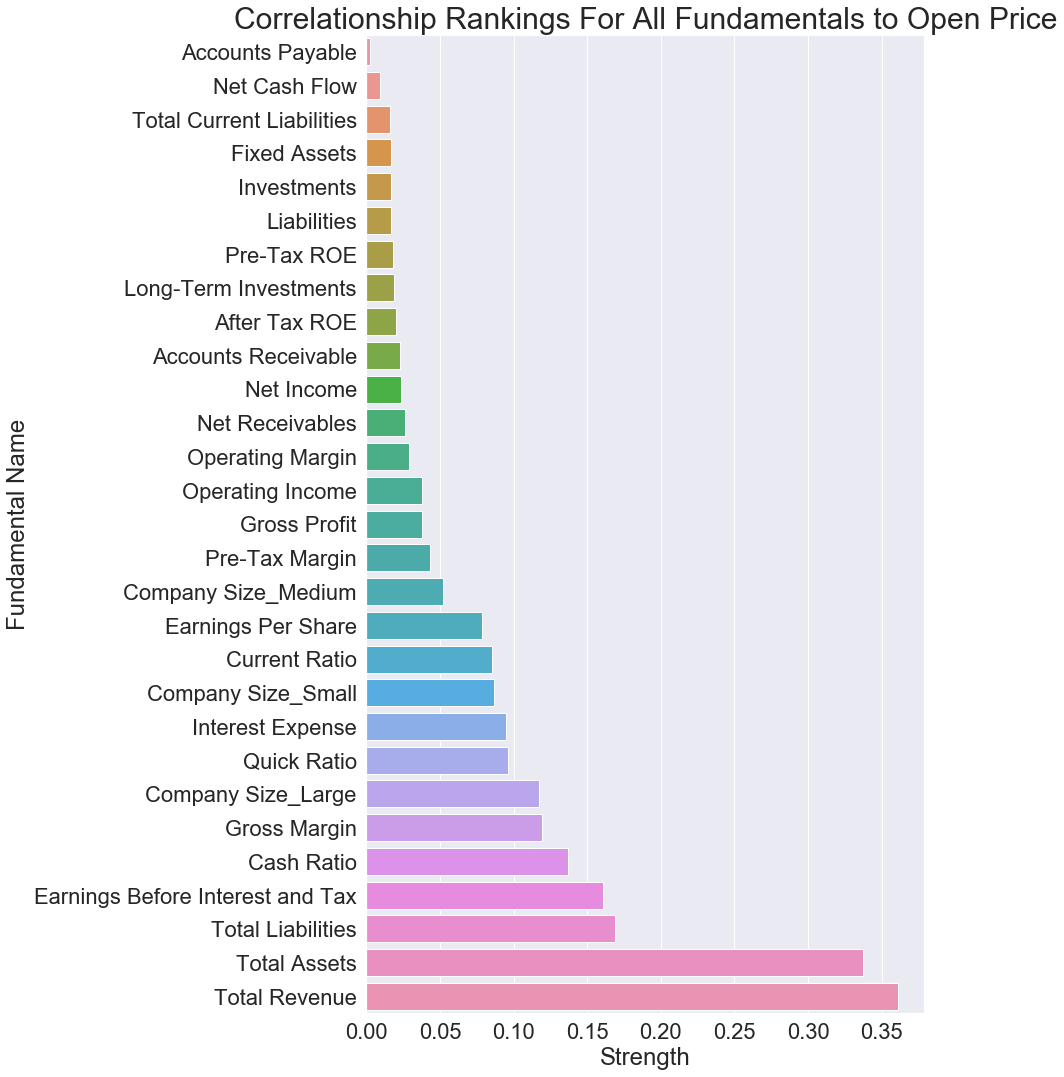

In [76]:
fig = plt.figure(figsize=[10, 18])
all_fundamentals_corr= combined_df.corr()
all_fundaments_name = all_fundamentals_corr['open'].index[0:len(all_fundamentals_corr) - 1]
all_fundamentals_corr['open']
# all_fundamentals_corr['Total Revenue'].index
fundamentals_corr_table = pd.DataFrame({
    'fundamental_names': all_fundaments_name,
    'strength' : all_fundamentals_corr['open'][0:len(all_fundamentals_corr) - 1].abs(),
});

fundamentals_corr_table =  fundamentals_corr_table.sort_values(by=['strength'])
fundamentals_corr_table
sns.barplot(x='strength', y='fundamental_names', data=fundamentals_corr_table)

# sns.barplot(x='strength', y='varible_names', data=corr_table_sj)
plt.title("Correlationship Rankings For All Fundamentals to Open Price", fontsize=30)
sns.set(font_scale = 2)
plt.xlabel("Strength")
plt.ylabel("Fundamental Name")
plt.savefig("img/rankings.png", bbox_inches = "tight")

In [47]:
def getStatisticData(dataset, target_variables):
    res_rvalue = list();
    res_pvalue = list();
    res_coeff = list();
    covariables = target_variables;
    for i in range(0, len(covariables)):
        x = dataset[covariables[i]]
        y = dataset.open
        res = sm.OLS(y, x).fit()
        rvalue = res.rsquared
        pvalue = res.pvalues
        coeff = res.params
        res_rvalue.append(rvalue)
        res_pvalue.append(pvalue[0])
        res_coeff.append(coeff[0])

    res_data = pd.DataFrame({
        'independent_name': covariables,
        'coeff':res_coeff,
        'p-value': res_pvalue,
        'r squared' : res_rvalue
    })
    return res_data


In [48]:
getStatisticData(combined_df, all_fundaments_name)

independent_name         coeff       p-value  r squared
0                      After Tax ROE  3.014744e-04  2.398054e-04   0.034301
1                         Cash Ratio  7.436499e-04  1.425114e-18   0.181391
2                 Company Size_Large  8.544316e-02  2.593378e-10   0.098221
3                Company Size_Medium  1.277165e-01  9.930016e-11   0.102588
4                 Company Size_Small  1.322335e-01  1.532012e-11   0.111040
5                      Current Ratio  4.519306e-04  4.648519e-25   0.241652
6                 Earnings Per Share  1.602211e-02  1.822309e-17   0.170666
7                       Gross Margin  1.814409e-03  1.010289e-27   0.265133
8                   Operating Margin  3.218403e-03  2.061316e-16   0.160335
9                     Pre-Tax Margin  3.142680e-03  2.617818e-15   0.149384
10                       Pre-Tax ROE  2.012062e-04  4.532902e-04   0.031319
11                       Quick Ratio  5.226523e-04  4.313680e-24   0.232942
12                  Accounts Payable  2.701919e-11  1.164052e-01   0.006358
13               Accounts Receivable -1.144974e-10  5.288098e-01   0.001026
14  Earnings Before Interest and Tax  1.343597e-02  6.642350e-04   0.029534
15                      Fixed Assets  1.312449e-12  3.791014e-01   0.002000
16                      Gross Profit  1.103567e-11  1.011464e-01   0.006929
17                  Interest Expense -6.077252e-12  5.065629e-01   0.001141
18                       Investments -1.563563e-11  4.619574e-01   0.001399
19                       Liabilities  1.425393e-12  7.818425e-01   0.000198
20             Long-Term Investments  1.308894e-12  5.095532e-03   0.020093
21                     Net Cash Flow  3.190218e-05  5.534259e-01   0.000908
22                        Net Income  2.279971e-04  7.651024e-01   0.000231
23                   Net Receivables  3.160954e-11  1.118978e-01   0.006517
24                  Operating Income  2.531266e-11  1.011464e-01   0.006929
25                      Total Assets  5.438543e-01  7.551562e-24   0.230737
26         Total Current Liabilities  5.477609e-12  3.030989e-02   0.012065
27                     Total Revenue  9.566495e-01  5.263923e-25   0.241169
28                 Total Liabilities  2.379323e-01  1.655630e-12   0.121016

In [49]:
def multiAnalysis(dataset):
    x = combined_df[all_fundaments_name]
    y = dataset.open
    res = sm.OLS(y, x).fit()
    return res



In [50]:
multi_res = multiAnalysis(combined_df)

In [51]:
multi_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   open   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     4.074
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           1.96e-10
Time:                        01:58:57   Log-Likelihood:                 210.66
No. Observations:                 388   AIC:                            -363.3
Df Residuals:                     359   BIC:                            -248.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
After Tax ROE                     6.886e-05      0.001      0.111      0.911      -0.001       0.001
Cash Ratio                           0.0004      0.000      1.724      0.086   -5.87e-05       0.001
Company Size_Large                   0.0853      0.028      3.087      0.002       0.031       0.140
Company Size_Medium                  0.1004      0.033      3.077      0.002       0.036       0.165
Company Size_Small                   0.0935      0.037      2.560      0.011       0.022       0.165
Current Ratio                    -4.334e-05      0.000     -0.214      0.830      -0.000       0.000
Earnings Per Share                   0.0006      0.002      0.251      0.802      -0.004       0.005
Gross Margin                         0.0007      0.000      1.668      0.096      -0.000       0.002
Operating Margin                    -0.0028      0.001     -1.924      0.055      -0.006    6.08e-05
Pre-Tax Margin                       0.0016      0.001      1.238      0.217      -0.001       0.004
Pre-Tax ROE                      -1.398e-05      0.000     -0.033      0.974      -0.001       0.001
Quick Ratio                         -0.0003      0.000     -1.155      0.249      -0.001       0.000
Accounts Payable                  9.744e-12   1.49e-11      0.654      0.513   -1.95e-11     3.9e-11
Accounts Receivable               2.866e-10   2.04e-10      1.408      0.160   -1.14e-10    6.87e-10
Earnings Before Interest and Tax     0.0050      0.004      1.310      0.191      -0.003       0.013
Fixed Assets                      9.436e-14   1.31e-12      0.072      0.942   -2.47e-12    2.66e-12
Gross Profit                        -0.0029      0.002     -1.387      0.166      -0.007       0.001
Interest Expense                 -1.428e-11   7.08e-12     -2.015      0.045   -2.82e-11   -3.44e-13
Investments                       1.674e-11   1.67e-11      1.000      0.318   -1.62e-11    4.96e-11
Liabilities                      -8.868e-13   3.96e-12     -0.224      0.823   -8.68e-12    6.91e-12
Long-Term Investments             2.865e-14   3.82e-13      0.075      0.940   -7.23e-13     7.8e-13
Net Cash Flow                     2.663e-05   4.15e-05      0.641      0.522   -5.51e-05       0.000
Net Income                          -0.0009      0.001     -1.014      0.311      -0.003       0.001
Net Receivables                  -4.591e-12   2.73e-11     -0.168      0.867   -5.83e-11    4.91e-11
Operating Income                     0.0066      0.005      1.387      0.166      -0.003       0.016
Total Assets                         0.4055      0.093      4.343      0.000       0.222       0.589
Total Current Liabilities         3.238e-13   2.45e-12      0.132      0.895   -4.49e-12    5.14e-12
Total Revenue                        0.4228      0.10

In [52]:
def forward_selected(data, response):
    """Linear model designed by forward selection.
        modifiey by He Chen: make it work for particular polynomial model

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels polynomial linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        i = 0
        for candidate in remaining:
            i = i + 1
            keys = '+'.join(selected + [candidate])
            if ("+" in keys):
                words = keys.split("+")
                x = data[words]
            else:
                x = data[keys]
            y = data.open
            score = sm.OLS(y, x).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    res_param = '+'.join(selected)
    if ("+" in res_param):
        keywords = res_param.split("+")
        x = data[keywords]
    else:
        x = data[res_param]
    y = data.open
    model = sm.OLS(y, x).fit()
    return model

In [53]:
best_model = forward_selected(combined_df, "open")

In [54]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   open   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     22.53
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           1.35e-39
Time:                        01:58:59   Log-Likelihood:                 204.43
No. Observations:                 388   AIC:                            -382.9
Df Residuals:                     375   BIC:                            -331.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Gross Margin                         0.0011      0.000      3.481      0.001       0.000       0.002
Total Revenue                        0.3860      0.102      3.779      0.000       0.185       0.587
Total Assets                         0.4051      0.091      4.446      0.000       0.226       0.584
Earnings Before Interest and Tax     0.0046      0.004      1.239      0.216      -0.003       0.012
Total Liabilities                   -0.1325      0.049     -2.710      0.007      -0.229      -0.036
Earnings Per Share                   0.0017      0.002      0.832      0.406      -0.002       0.006
Interest Expense                 -1.408e-11   7.02e-12     -2.005      0.046   -2.79e-11    -2.7e-13
Operating Income                     0.0070      0.005      1.560      0.120      -0.002       0.016
Gross Profit                        -0.0031      0.002     -1.560      0.120      -0.007       0.001
Company Size_Medium                  0.0328      0.019      1.697      0.091      -0.005       0.071
Company Size_Large                   0.0270      0.015      1.817      0.070      -0.002       0.056
Operating Margin                    -0.0008      0.001     -1.329      0.185      -0.002       0.000
After Tax ROE                      7.44e-05   6.73e-05      1.106      0.269   -5.79e-05       0.000
==============================================================================
Omnibus:                      105.200   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.409
Skew:                           1.266   Prob(JB):                     1.59e-65
Kurtosis:                       6.471   Cond. No.                     2.56e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
best_model.predict()

array([ 0.3108587 ,  0.20037051,  0.150946  ,  0.10834366,  0.17548315,
        0.00541749,  0.20536538,  0.10029964,  0.0730071 ,  0.09926596,
        0.04068818,  0.05455326,  0.05760437,  0.07120819,  0.27944187,
        0.07353133,  0.16790238,  0.13613365,  0.06709842,  0.15934594,
        0.38067291,  0.0891365 ,  0.16446125,  0.1376867 ,  0.14140707,
        0.19918228,  0.17646968,  0.0920162 ,  0.0929254 ,  0.12916229,
       -0.13571073, -0.02660345,  0.05127732,  0.11524959,  0.03306215,
        0.04020243,  0.21016754,  0.06474246,  0.056634  ,  0.07992598,
        0.12143555,  0.06493335,  0.05835666,  0.05495821,  0.07622226,
        0.06297496,  0.19583576, -0.01851812,  0.18153438,  0.1341733 ,
        0.05844455,  0.08811257,  0.09955602,  0.07152957,  0.09707163,
        0.14514899,  0.10775886,  0.02861074,  0.07649518,  0.13511769,
        0.15138141,  0.06856997,  0.23668448,  0.04521029,  0.07342478,
        0.05741163,  0.02521091,  0.06126615,  0.2140533 ,  0.11

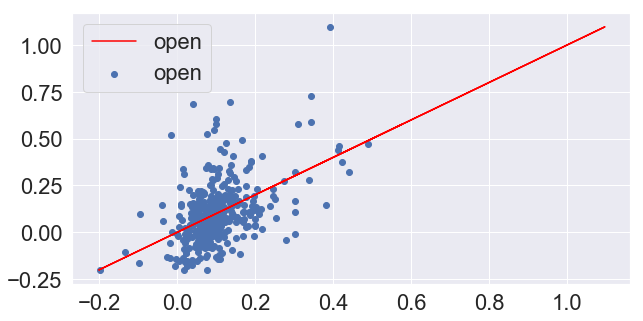

In [57]:
# def accuracyCheckingGraph
fig = plt.figure(figsize=[10, 5])
plt.scatter(best_model.predict(), combined_df.open)
plt.plot(combined_df.open, combined_df.open, color="red")
plt.legend()
plt.savefig("img/linear.png")
plt.show()

In [59]:
# Time series 
from sklearn.model_selection import train_test_split # splitting data
train_features, test_features, train_outcome, test_outcome = train_test_split(
    combined_df.drop("open", axis=1),
    combined_df.open,
    test_size=.3,
    random_state=11
)

In [60]:
# Fit the classifier using training data
from sklearn.preprocessing import MinMaxScaler       # scaling data
# Create instances of classifier and scaler
scaler = MinMaxScaler() 
knn_reg = KNeighborsRegressor()

#Define a pipeline that uses your scaler and classifier
pipe = make_pipeline(scaler, knn_reg)

#define a grid to search through
param_grid = {'kneighborsregressor__n_neighbors':range(1, 5), 'kneighborsregressor__weights':["uniform", "distance"]}

#perform a grid search of pipeline
grid = GridSearchCV(pipe, param_grid, scoring="neg_mean_absolute_error")
grid.fit(train_features, train_outcome)
grid.score(test_features, test_outcome)

-0.12253675494811674

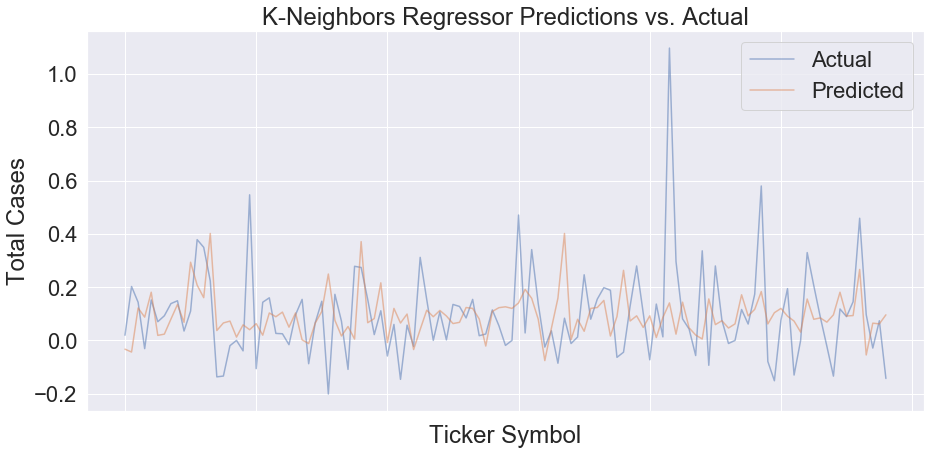

In [61]:
test_data = test_features.join(test_outcome)
test_data['preds'] = grid.predict(test_data.drop("open", axis = 1))
plt.figure(figsize=(15, 7))
test_data.open.plot(label="Actual", alpha = .5)
test_data.preds.plot(label="Predicted", alpha = .5)
plt.title('K-Neighbors Regressor Predictions vs. Actual')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig("img/kneighbors.png")

In [62]:
from sklearn.tree import DecisionTreeRegressor
# Fit the classifier using training data
from sklearn.preprocessing import MinMaxScaler       # scaling data
# Create instances of classifier and scaler
scaler = MinMaxScaler() 

#define a grid to search through
param_grid = {'max_depth': np.arange(3, 5)}

#perform a grid search of pipeline
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring="neg_mean_absolute_error")
grid.fit(train_features, train_outcome)
grid.score(test_features, test_outcome)

-0.11830890483162651

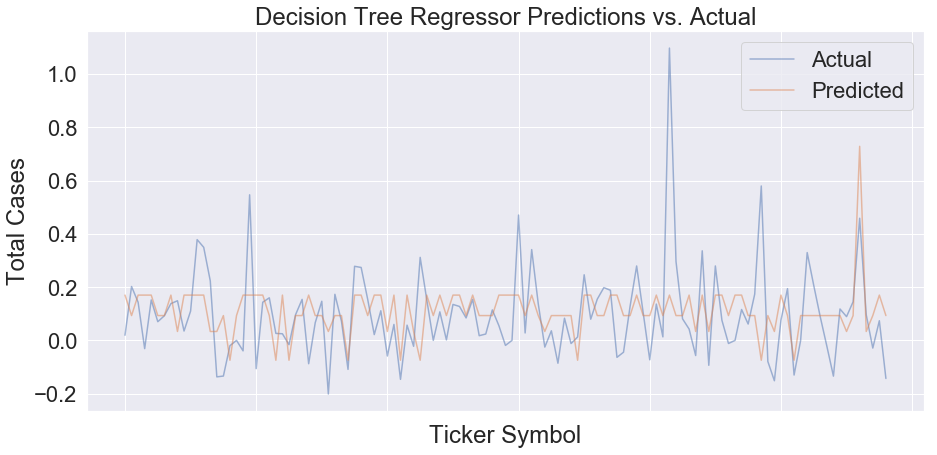

In [63]:
test_data = test_features.join(test_outcome)
test_data['preds'] = grid.predict(test_data.drop("open", axis = 1))
plt.figure(figsize=(15, 7))
test_data.open.plot(label="Actual", alpha = .5)
test_data.preds.plot(label="Predicted", alpha = .5)
plt.title('Decision Tree Regressor Predictions vs. Actual')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig("img/decisiontree.png")

In [64]:
#Import Library
from sklearn.ensemble import RandomForestRegressor
# Create Random Forest object

param_grid = {}

model= RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_absolute_error", cv=10)
grid_search.fit(train_features, train_outcome)
grid_search.score(test_features, test_outcome)

-0.10923635874084806

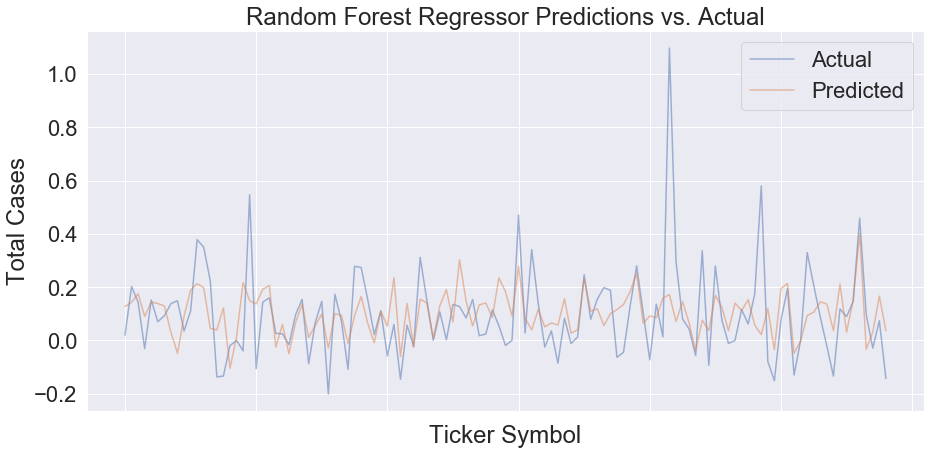

In [65]:
test_data = test_features.join(test_outcome)
test_data['preds'] = grid_search.predict(test_data.drop("open", axis = 1))
plt.figure(figsize=(15, 7))
test_data.open.plot(label="Actual", alpha = .5)
test_data.preds.plot(label="Predicted", alpha = .5)
plt.title('Random Forest Regressor Predictions vs. Actual')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig("img/randomforest.png")

In [69]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import SelectPercentile
krr = KernelRidge()
krr_selecter = SelectPercentile()
krr_pipe = make_pipeline(krr_selecter, krr)
param_grid = {'kernelridge__kernel' : ['linear', 'sigmoid', 'polynomial', 'cosine', 'rbf', 'sigmoid', 'laplacian'],
              'kernelridge__degree' : range(1, 5)}
krr_grid = GridSearchCV(krr_pipe, param_grid, scoring="neg_mean_absolute_error", cv=5)
krr_grid.fit(train_features, train_outcome)
krr_grid.score(test_features, test_outcome)

-0.11182929313570625

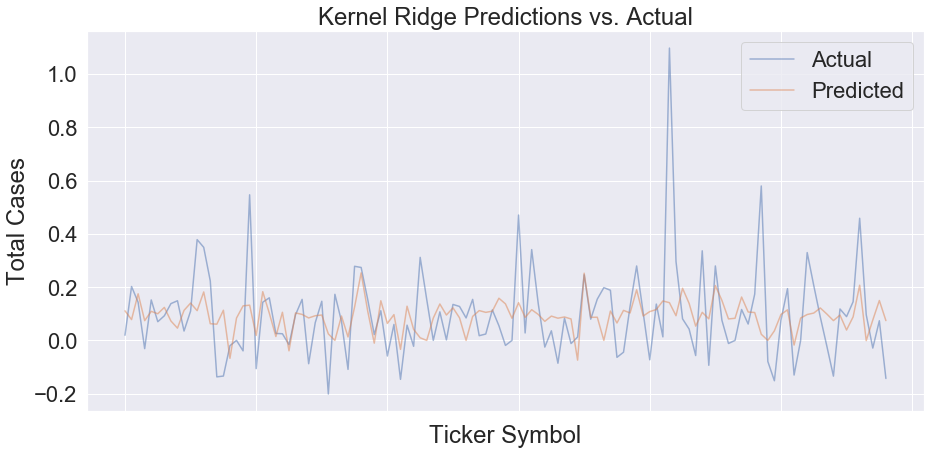

In [70]:
test_data = test_features.join(test_outcome)
test_data['preds'] = krr_grid.predict(test_data.drop("open", axis = 1))
plt.figure(figsize=(15, 7))
test_data.open.plot(label="Actual", alpha = .5)
test_data.preds.plot(label="Predicted", alpha = .5)
plt.title('Kernel Ridge Predictions vs. Actual')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig("img/kernelridge.png")

In [1]:
stock_fundamentals

NameError: name 'stock_fundamentals' is not defined